# Essential Libraries

In [21]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier

# Dataset Import

In [22]:
data_dir = '../../res/ready_to_use'

In [23]:
chicago = pd.read_csv(
    data_dir + '/Chicago.csv',
    encoding= 'unicode_escape')
chicago = chicago.drop(columns=['PRIM_CONTRIBUTORY_CAUSE'])
chicago_copy = chicago.copy()
chicago.head()



,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,STREET_DIRECTION,DOORING_I,WORK_ZONE_I,NUM_UNITS,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,15,NO CONTROLS,NO CONTROLS,CLEAR,['DARKNESS'],FIXED OBJECT,ALLEY,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,0,N,W,N,"('N',)",1,NO INDICATION OF INJURY,2,Tuesday,5
1,20,NO CONTROLS,NO CONTROLS,CLEAR,"['DARKNESS', 'LIGHTED ROAD']",FIXED OBJECT,NOT DIVIDED,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,0,N,W,N,"('N',)",1,NO INDICATION OF INJURY,1,Tuesday,5
2,30,NO CONTROLS,NO CONTROLS,CLEAR,"['DARKNESS', 'LIGHTED ROAD']",FIXED OBJECT,DIVIDED - W/MEDIAN BARRIER,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,1,N,W,N,"('N',)",2,NO INDICATION OF INJURY,0,Tuesday,5
3,30,NO CONTROLS,NO CONTROLS,CLEAR,"['DARKNESS', 'LIGHTED ROAD']",SIDESWIPE SAME DIRECTION,NOT DIVIDED,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,0,N,W,N,"('N',)",2,NO INDICATION OF INJURY,22,Monday,5
4,35,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"['DARKNESS', 'LIGHTED ROAD']",ANGLE,FOUR WAY,"('STRAIGHT', 'LEVEL')",DRY,NO DEFECTS,1,N,N,N,"('N',)",2,NO INDICATION OF INJURY,21,Monday,5


# Exploratory Data Analysis (EDA)

In [24]:
def histogram(df, colname, num_bins=20, figsize=(10, 5)):
  _, ax = plt.subplots(figsize=figsize)
  x_locator = ticker.AutoLocator()
  arr = plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  #for i in range(num_bins):
  #  plt.text(arr[1][i],arr[0][i],str(arr[0][i]))
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False) 
  ax.xaxis.set_major_locator(x_locator)
  plt.tight_layout()
  plt.show()

In [25]:
def categorical_histogram(df, colname, figsize=(30, 10), mpl_palette_name='Dark2', direction='h', top_values = None):
  _, ax = plt.subplots(figsize=figsize)
  bars = df[colname].value_counts()
  if top_values != None:
    bars = df[colname].value_counts()[:top_values]
  if direction == 'h':
    plt.barh(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  else:
    plt.bar(bars.index, bars.values, color=sns.palettes.mpl_palette(mpl_palette_name))
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.show()

**Phân phối số lượng tai nạn theo giới hạn tốc độ**

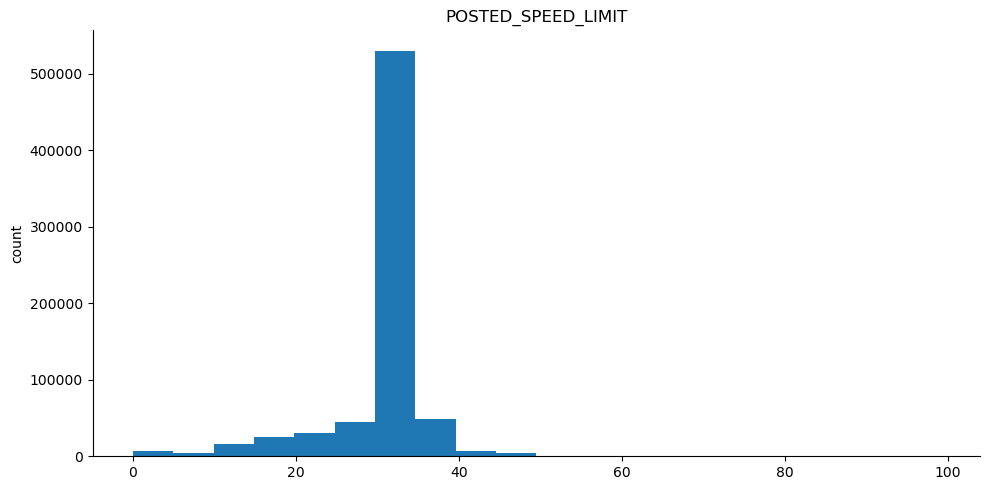

In [26]:
histogram(chicago, *['POSTED_SPEED_LIMIT'], **{})

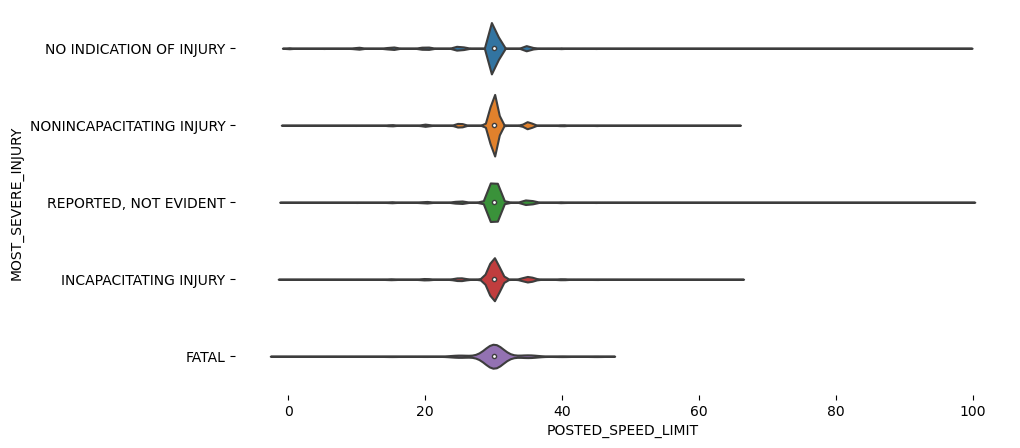

In [27]:
plt.figure(figsize=(10, len(chicago['MOST_SEVERE_INJURY'].unique())))
sns.violinplot(chicago, x=chicago['POSTED_SPEED_LIMIT'], y=chicago['MOST_SEVERE_INJURY'])
sns.despine(top=True, right=True, bottom=True, left=True)
plt.show()

Cả 4 loại tai nạn đều chủ yếu diễn ở đường có giới hạn tốc độ trong mức 30mph (khoảng 48km/h).

**Phân phối số lượng tai nạn theo điều kiện thời tiết**

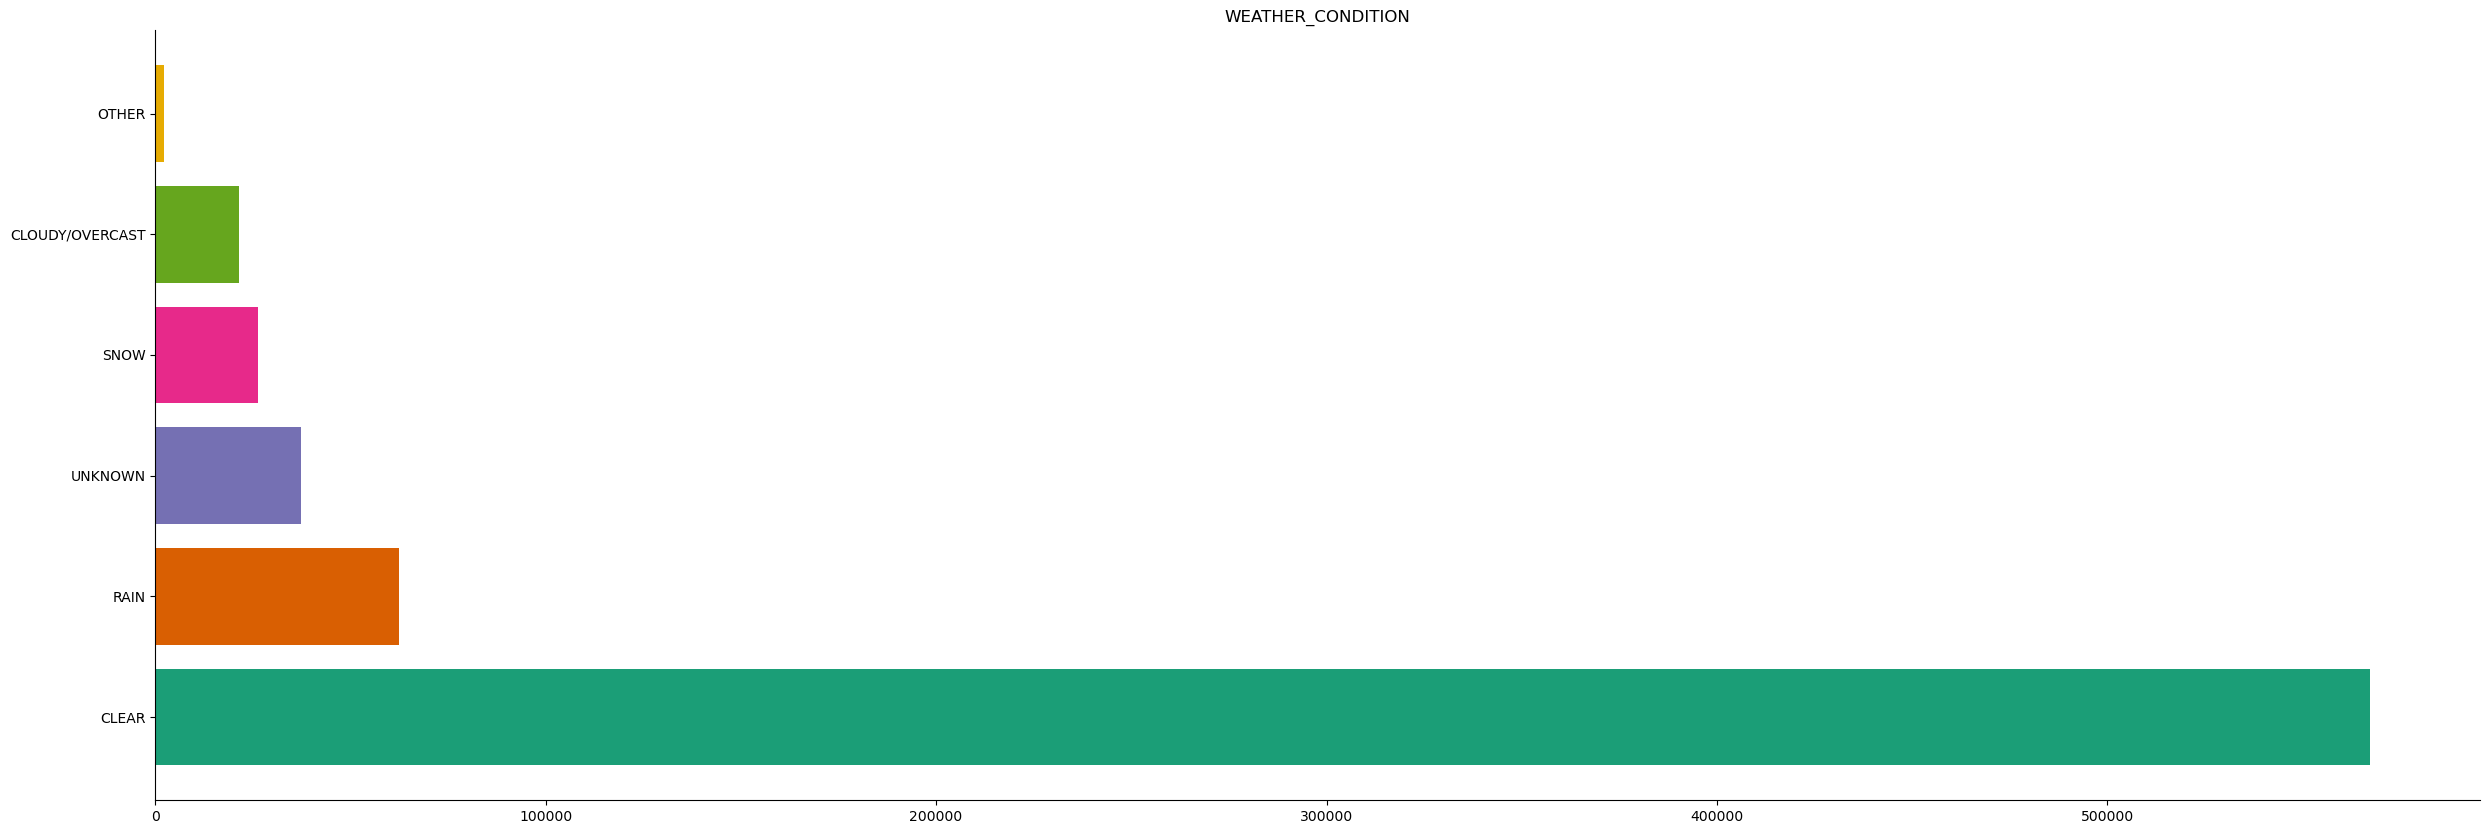

In [28]:
categorical_histogram(chicago, *['WEATHER_CONDITION'], top_values=6)

Trong hầu hết các vụ tai nạn điều kiện thời tiết là bình thường (trời quang - CLEAR).

**Phân phối số lượng tai nạn theo điều kiện bề mặt đường**

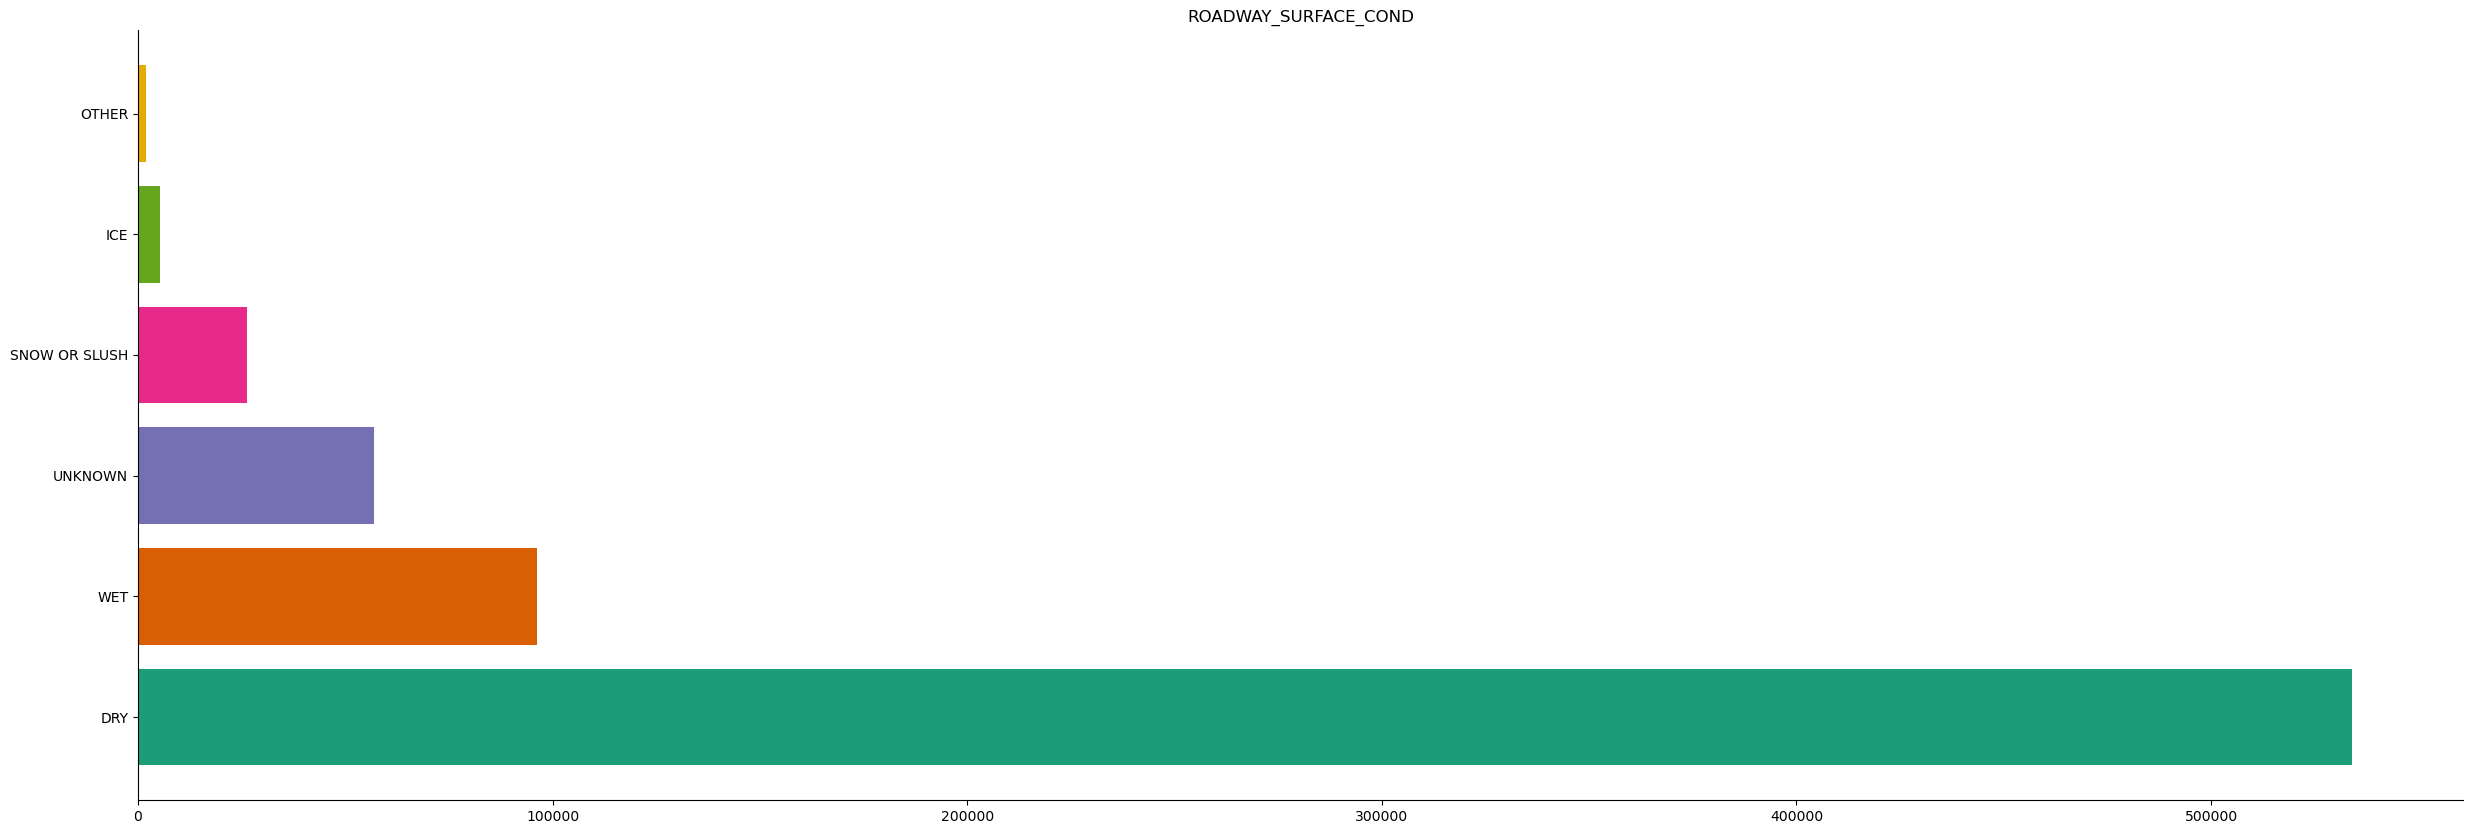

In [29]:
categorical_histogram(chicago, *['ROADWAY_SURFACE_COND'], top_values=6)

Trong hầu hết các vụ tai nạn: mặt đường, tương ứng với thời tiết, đều trong điều kiện khô ráo.

**Phân phối số lượng tai nạn theo hư hỏng trên bề mặt đường**

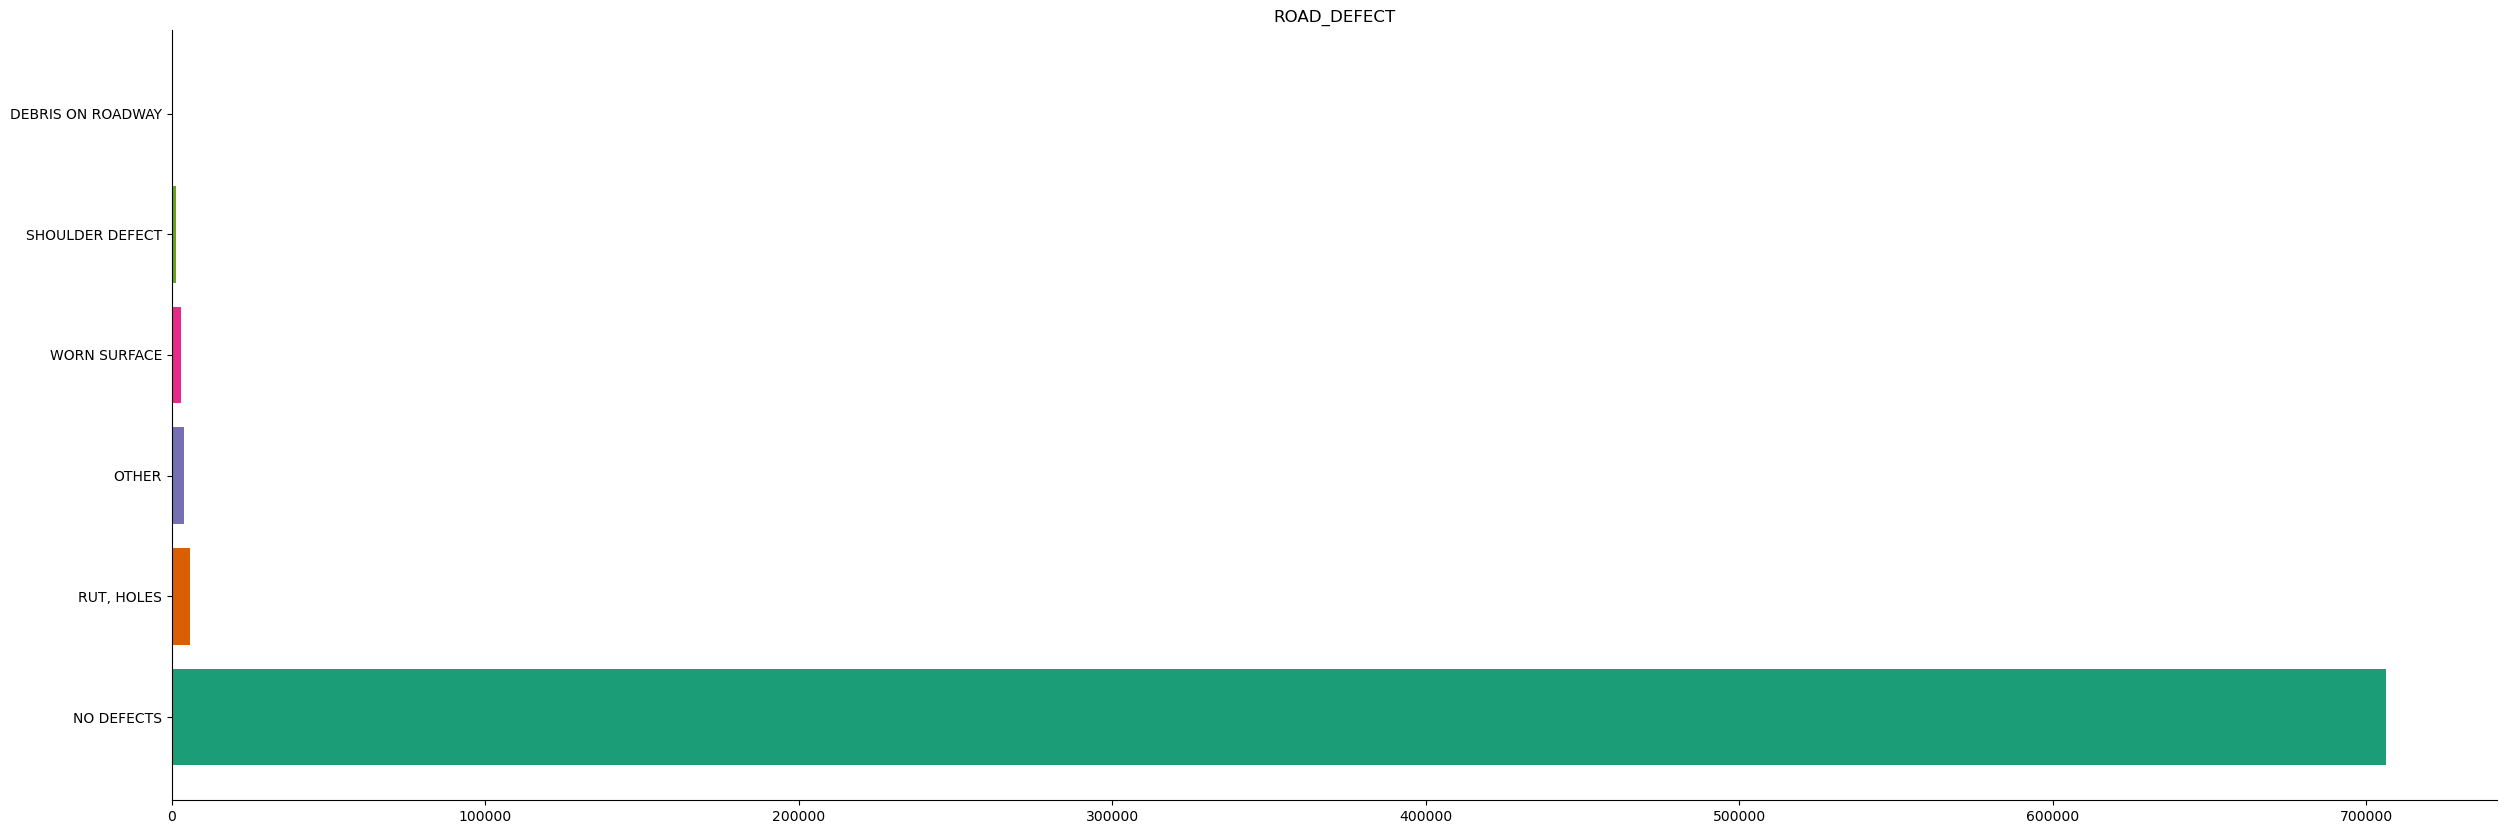

In [30]:
categorical_histogram(chicago, *['ROAD_DEFECT'])

Hâù hết các vụ tai nạn đều không có hư hỏng gì trên đường trước đó.

**Phân phối số lượng tai nạn theo điều kiện chiếu sáng**

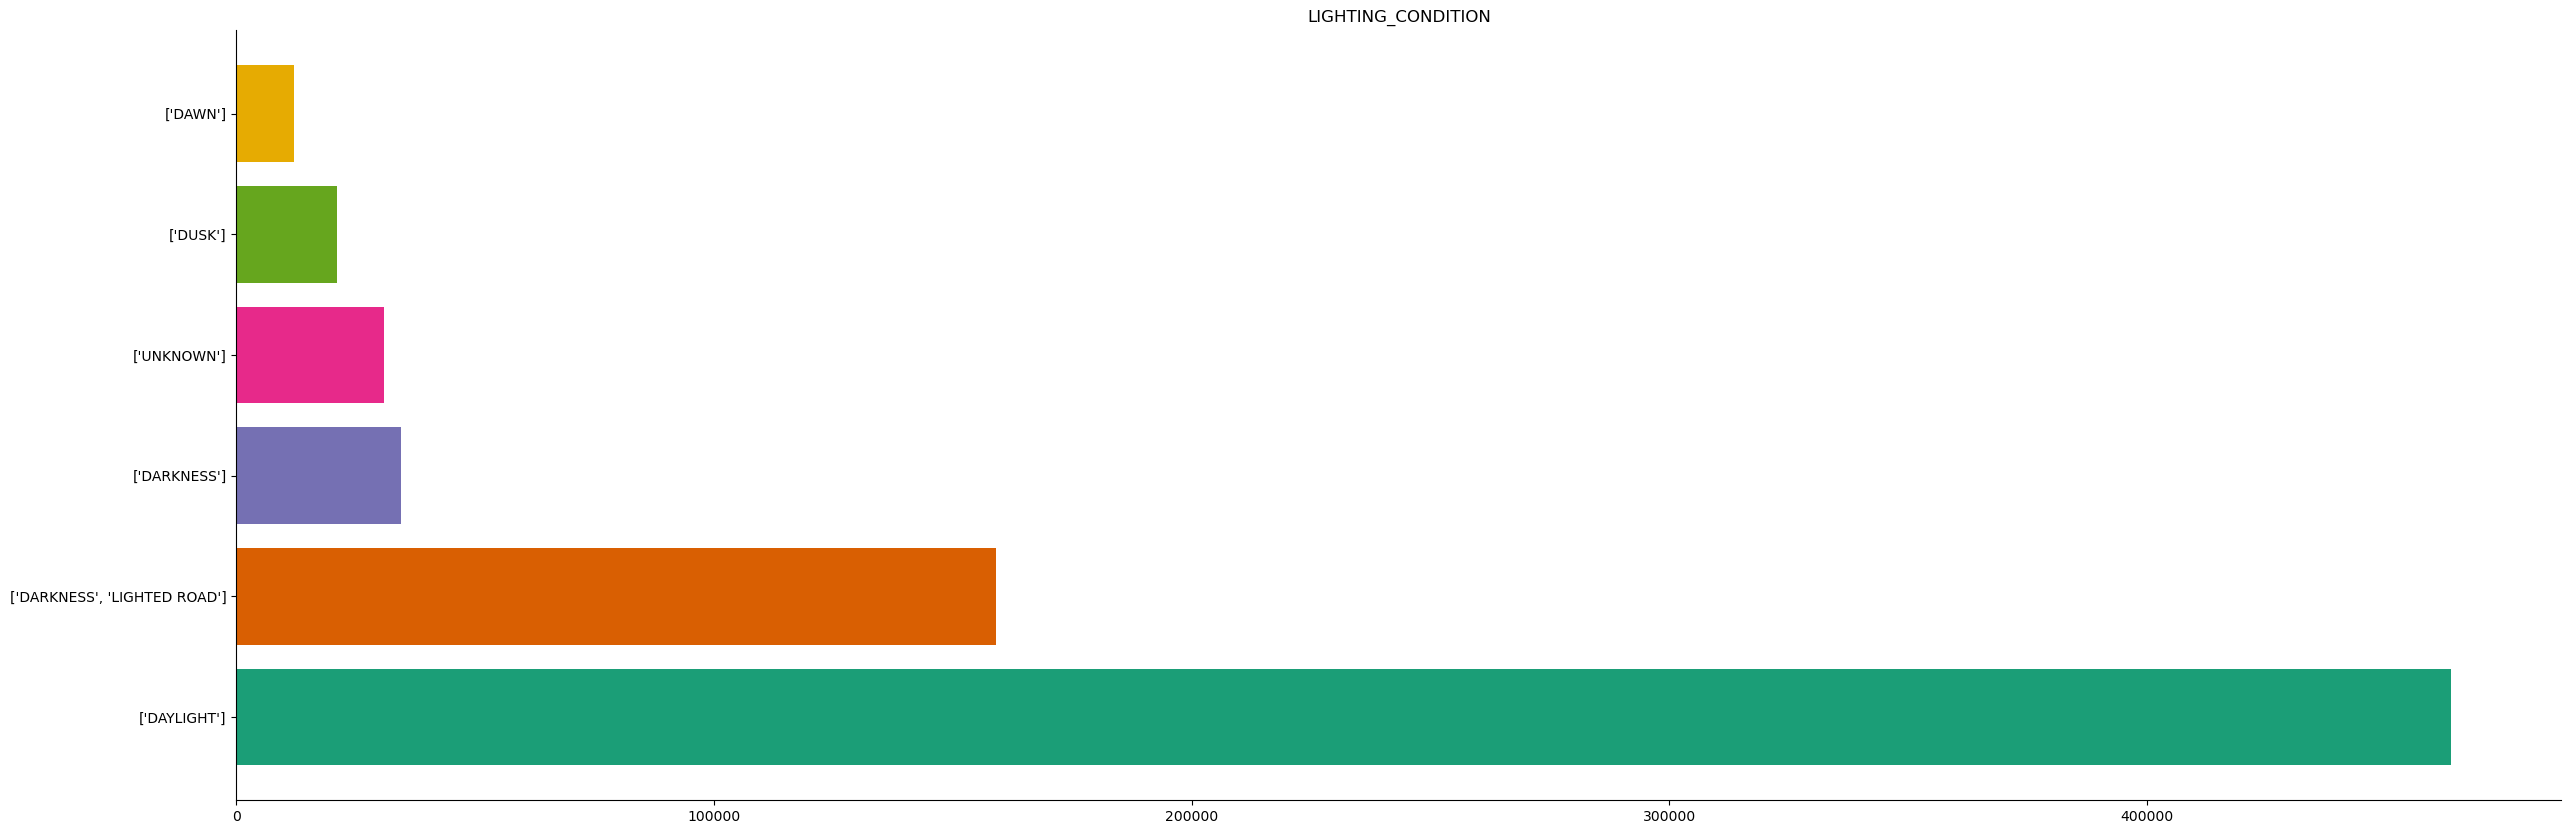

In [31]:
categorical_histogram(chicago, *['LIGHTING_CONDITION'])

Hầu hết các vụ tai nạn xảy ra vào ban ngày, khi có ánh sáng mặt trời (DAYLIGHT). Tuy nhiên ở feature này giá trị đứng thứ 2 cũng có một lượng đáng kể (DARKNESS, LIGHTED ROAD)

**Phân phối số lượng tai nạn theo va chạm đầu tiên**

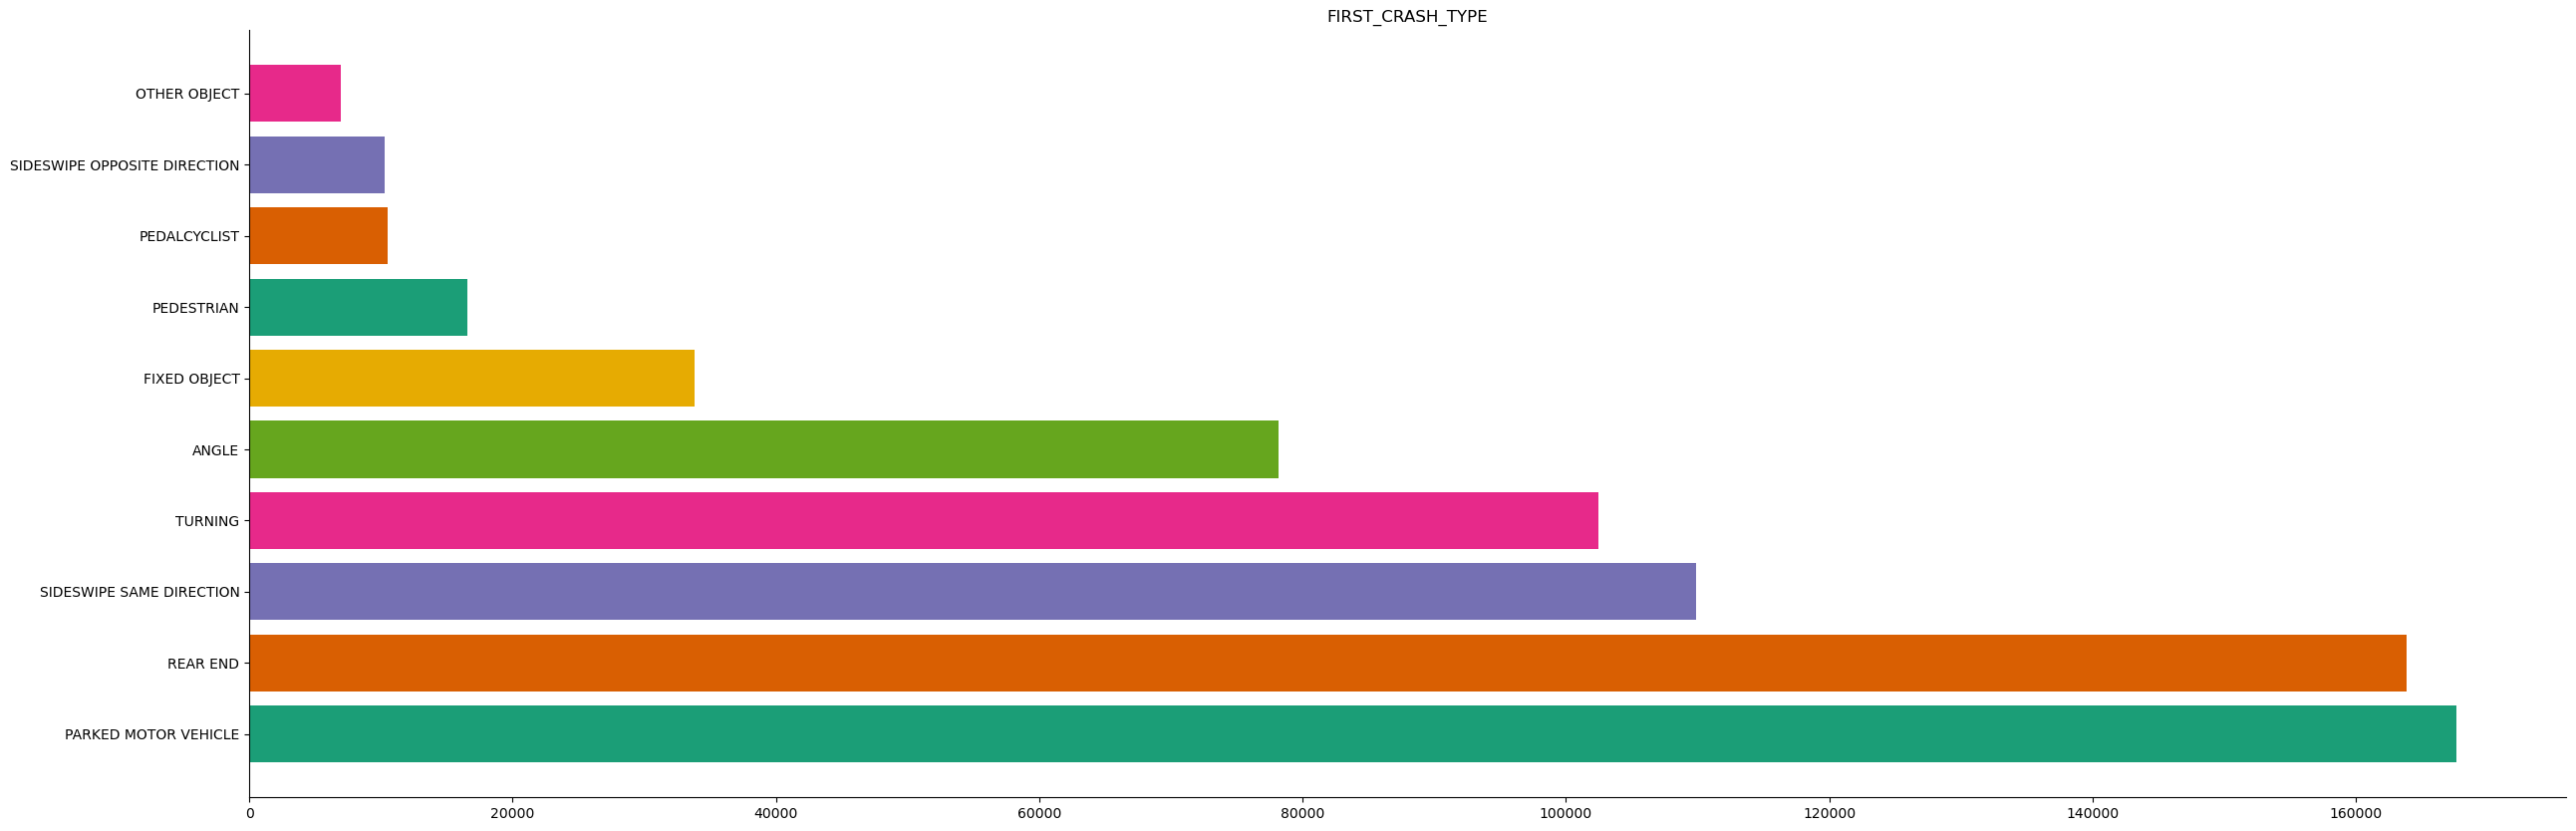

In [32]:
categorical_histogram(chicago, *['FIRST_CRASH_TYPE'], top_values = 10)

Va chạm chủ yếu là vào các phương tiện dừng đỗ (PARKER MOTOR VEHICLE) và vào sau xe (REAR END). Tiếp đến là các va chạm từ phía bên cạnh (SIDESWIPE - quệt ngang, TURNING - va chạm khi rẽ, ANGLE - đâm vào góc).

**Phân phối số lượng tai nạn theo dạng đường**

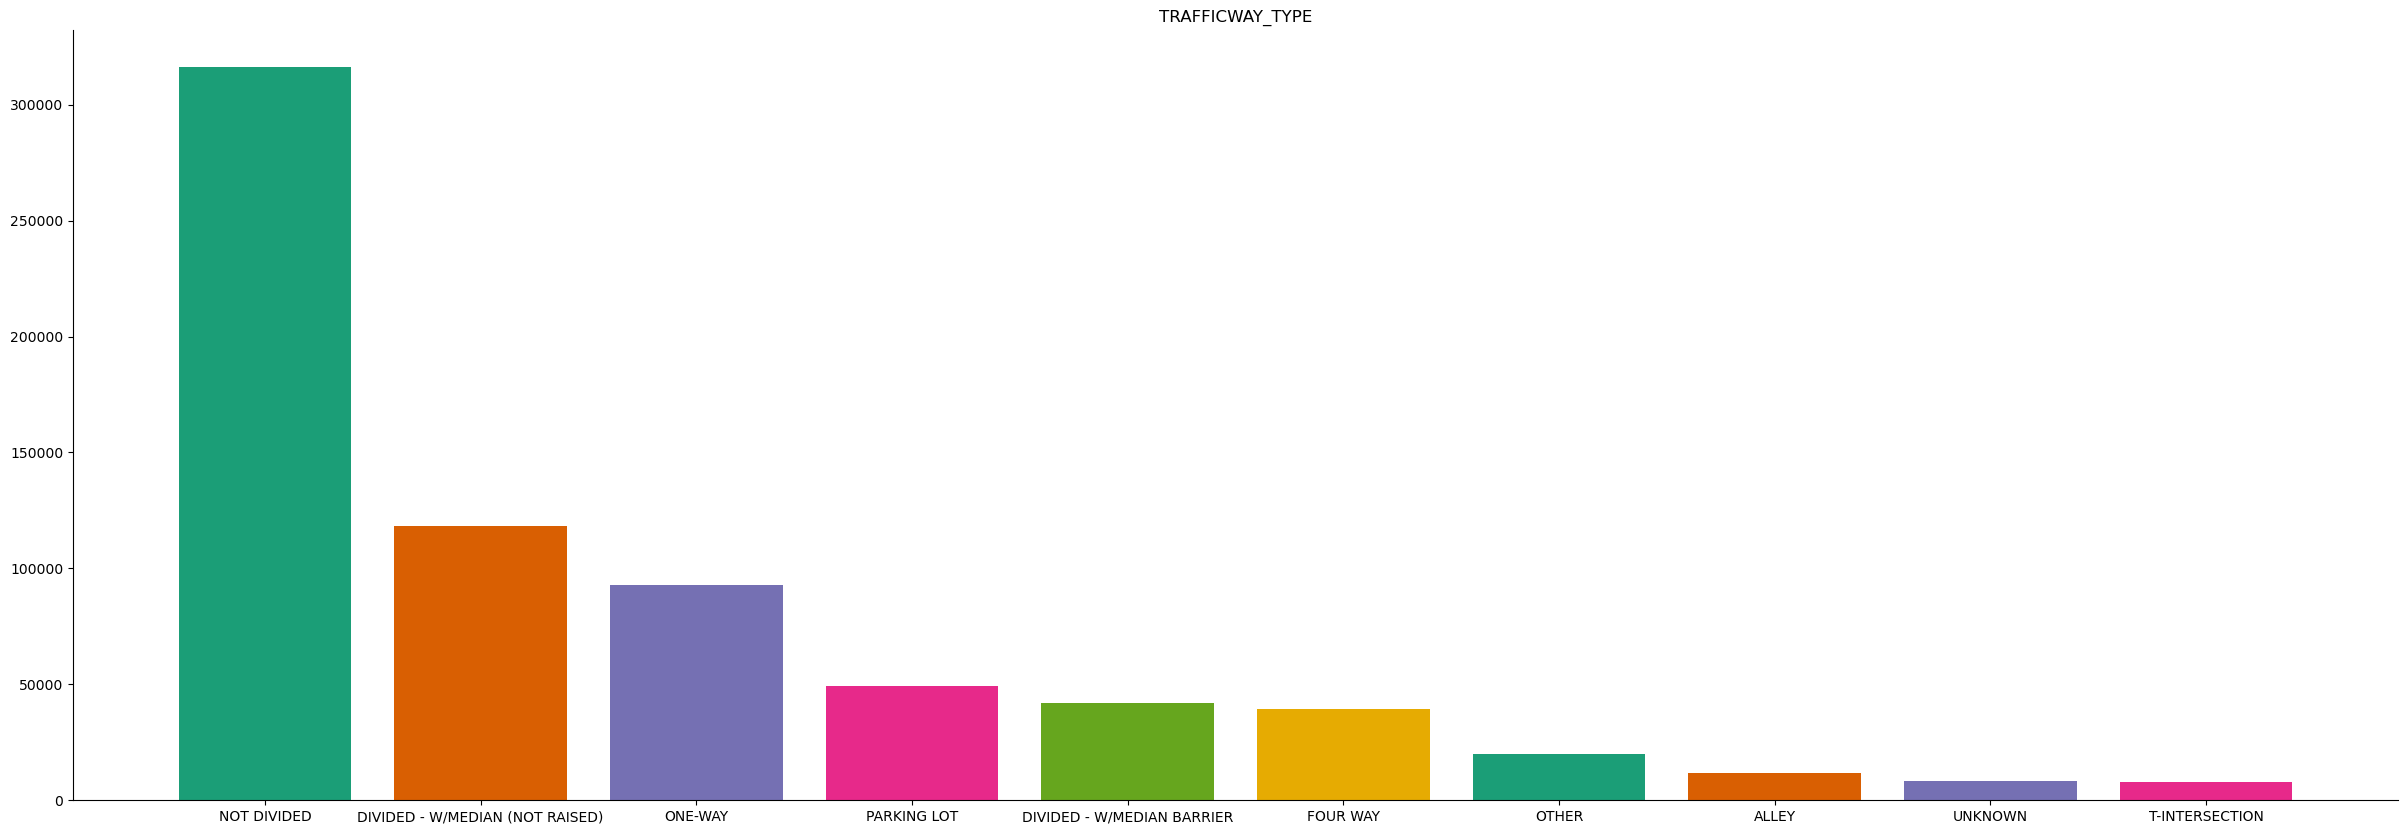

In [33]:
categorical_histogram(chicago, *['TRAFFICWAY_TYPE'], top_values = 10, direction  ='v')

Tai nạn chủ yếu xảy ra ở đường hai chiều không có dải phân cách.

**Phân phối số lượng tai nạn theo tháng**

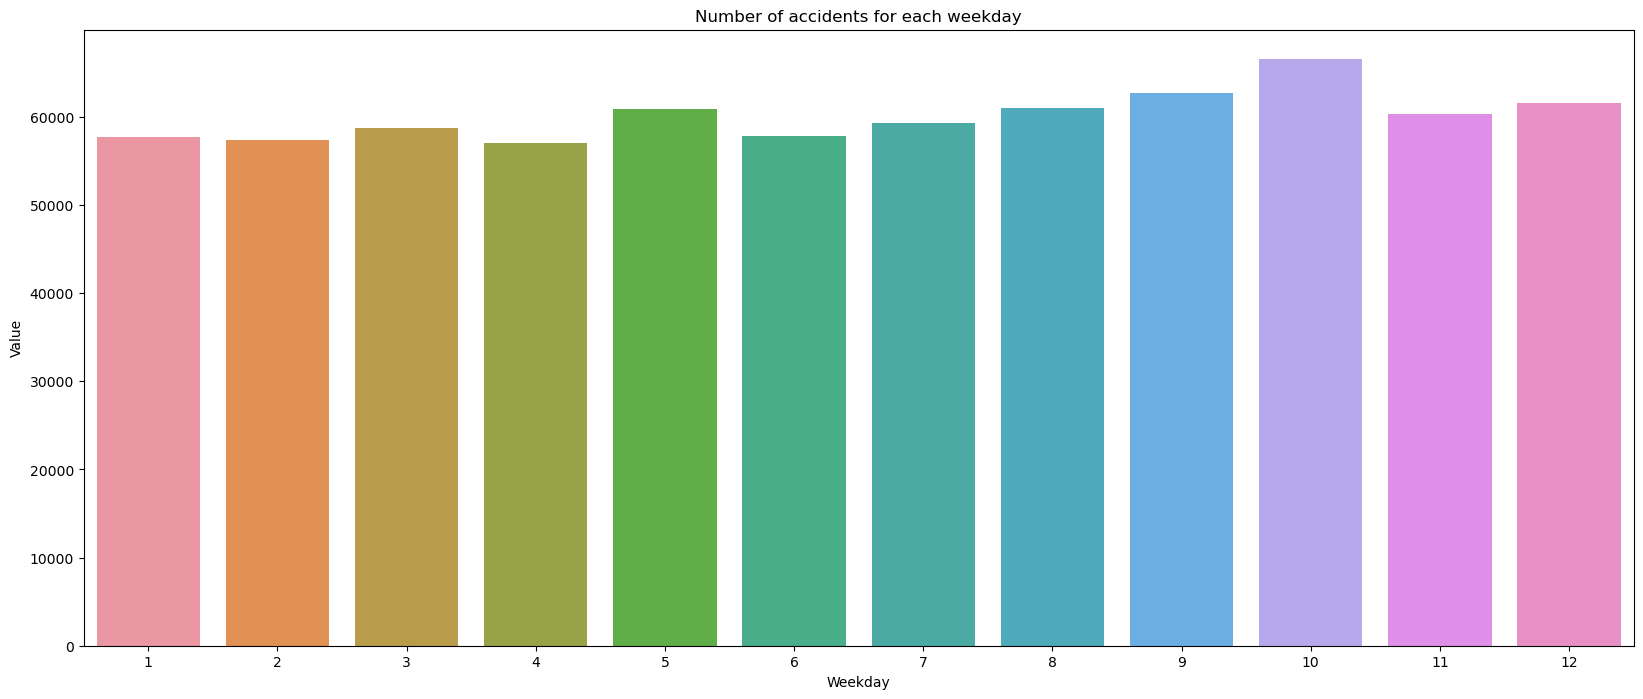

In [34]:
counts = chicago['CRASH_MONTH'].value_counts()
months = range(1,13)

plt.figure(figsize=(20, 8))
plt.title("Number of accidents for each weekday")
sns.barplot(x = counts.index, y = counts.values, order=months)
plt.xlabel("Weekday")
plt.ylabel("Value")
plt.show()

**Phân phối số lượng tai nạn theo các ngày trong tuần**

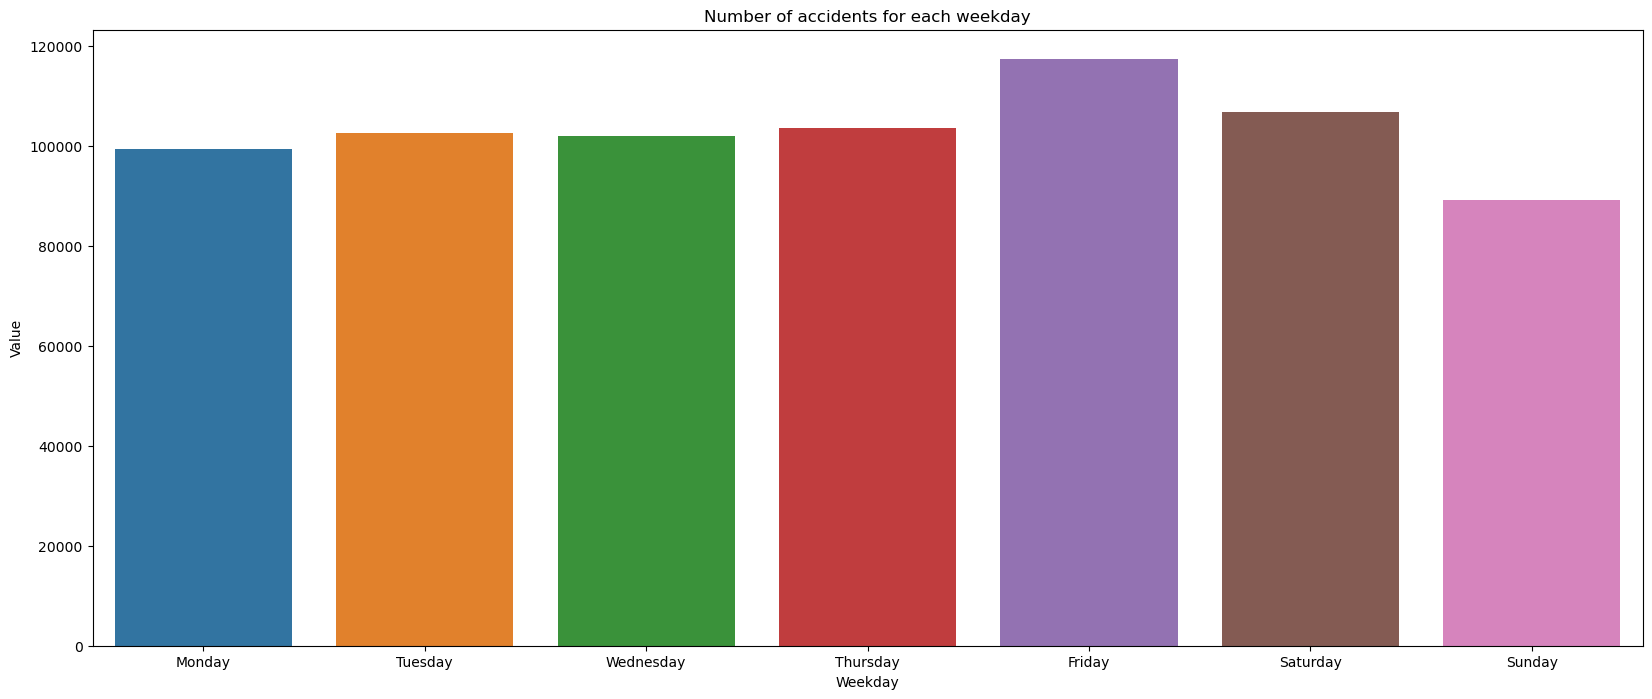

In [35]:
counts = chicago['CRASH_DAY_OF_WEEK'].value_counts()
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure(figsize=(20, 8))
plt.title("Number of accidents for each weekday")
sns.barplot(x = counts.index, y = counts.values, order=weekdays)
plt.xlabel("Weekday")
plt.ylabel("Value")
plt.show()

Phân phối tai nạn giữa các ngày trong tuần tương đối đều, chỉ nhỉnh hơn khoảng 10 - 20% vào 2 ngày thứ 6 và thứ 7.

**Phân phối số lượng tai nạn theo giờ**

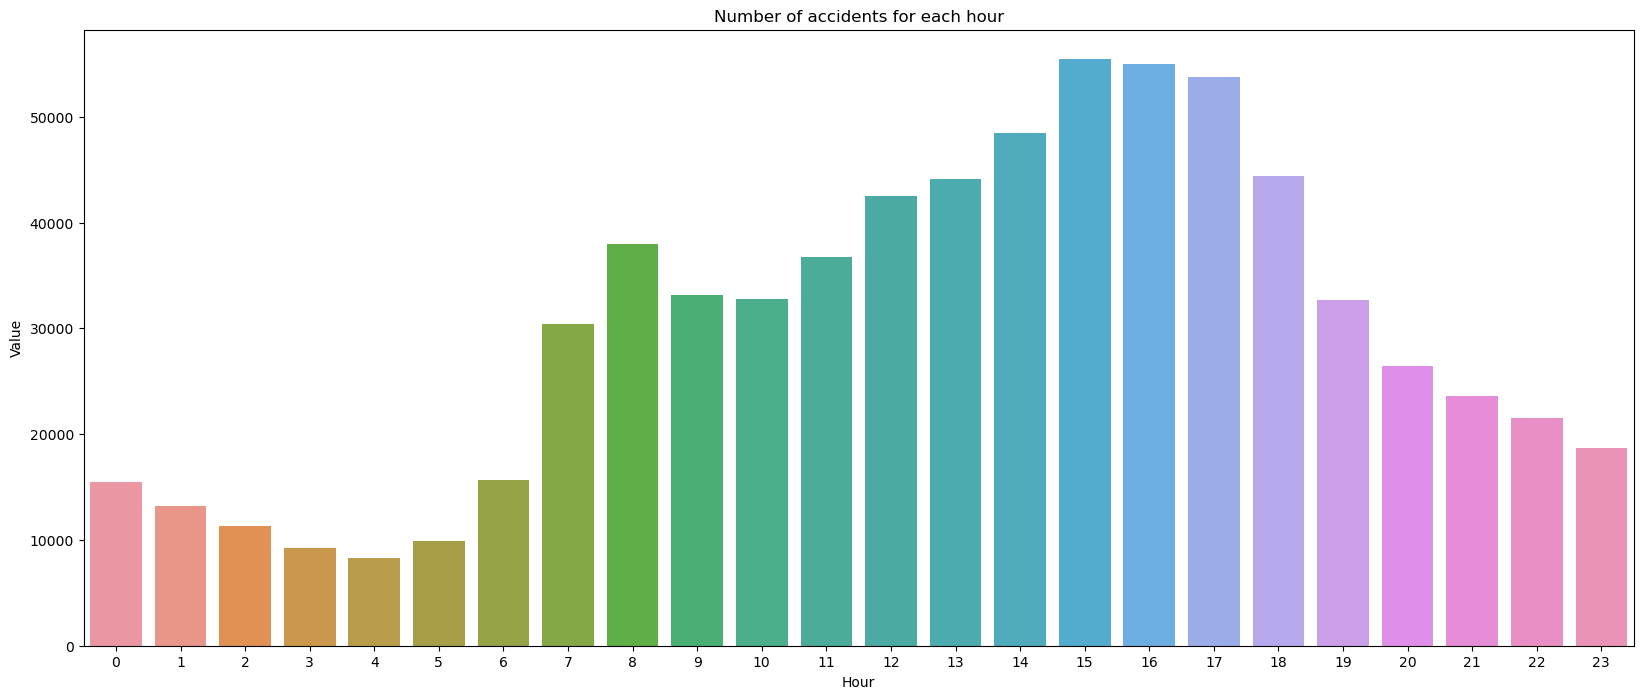

In [36]:
counts = chicago['CRASH_HOUR'].value_counts()
hours = range(24)

plt.figure(figsize=(20, 8))
plt.title("Number of accidents for each hour")
sns.barplot(x = counts.index, y = counts.values, order=hours)
plt.xlabel("Hour")
plt.ylabel("Value")
plt.show()

Thời gian diễn ra tai nạn chủ yếu tăng dần vào buổi chiều, và nhiều nhất ở khung giờ từ 15 đến 17 giờ chiều, có thể do đó là giờ tan tầm / giờ học sinh đi học về. 

**Phân phối số lượng tai nạn theo mức độ nghiêm trọng**

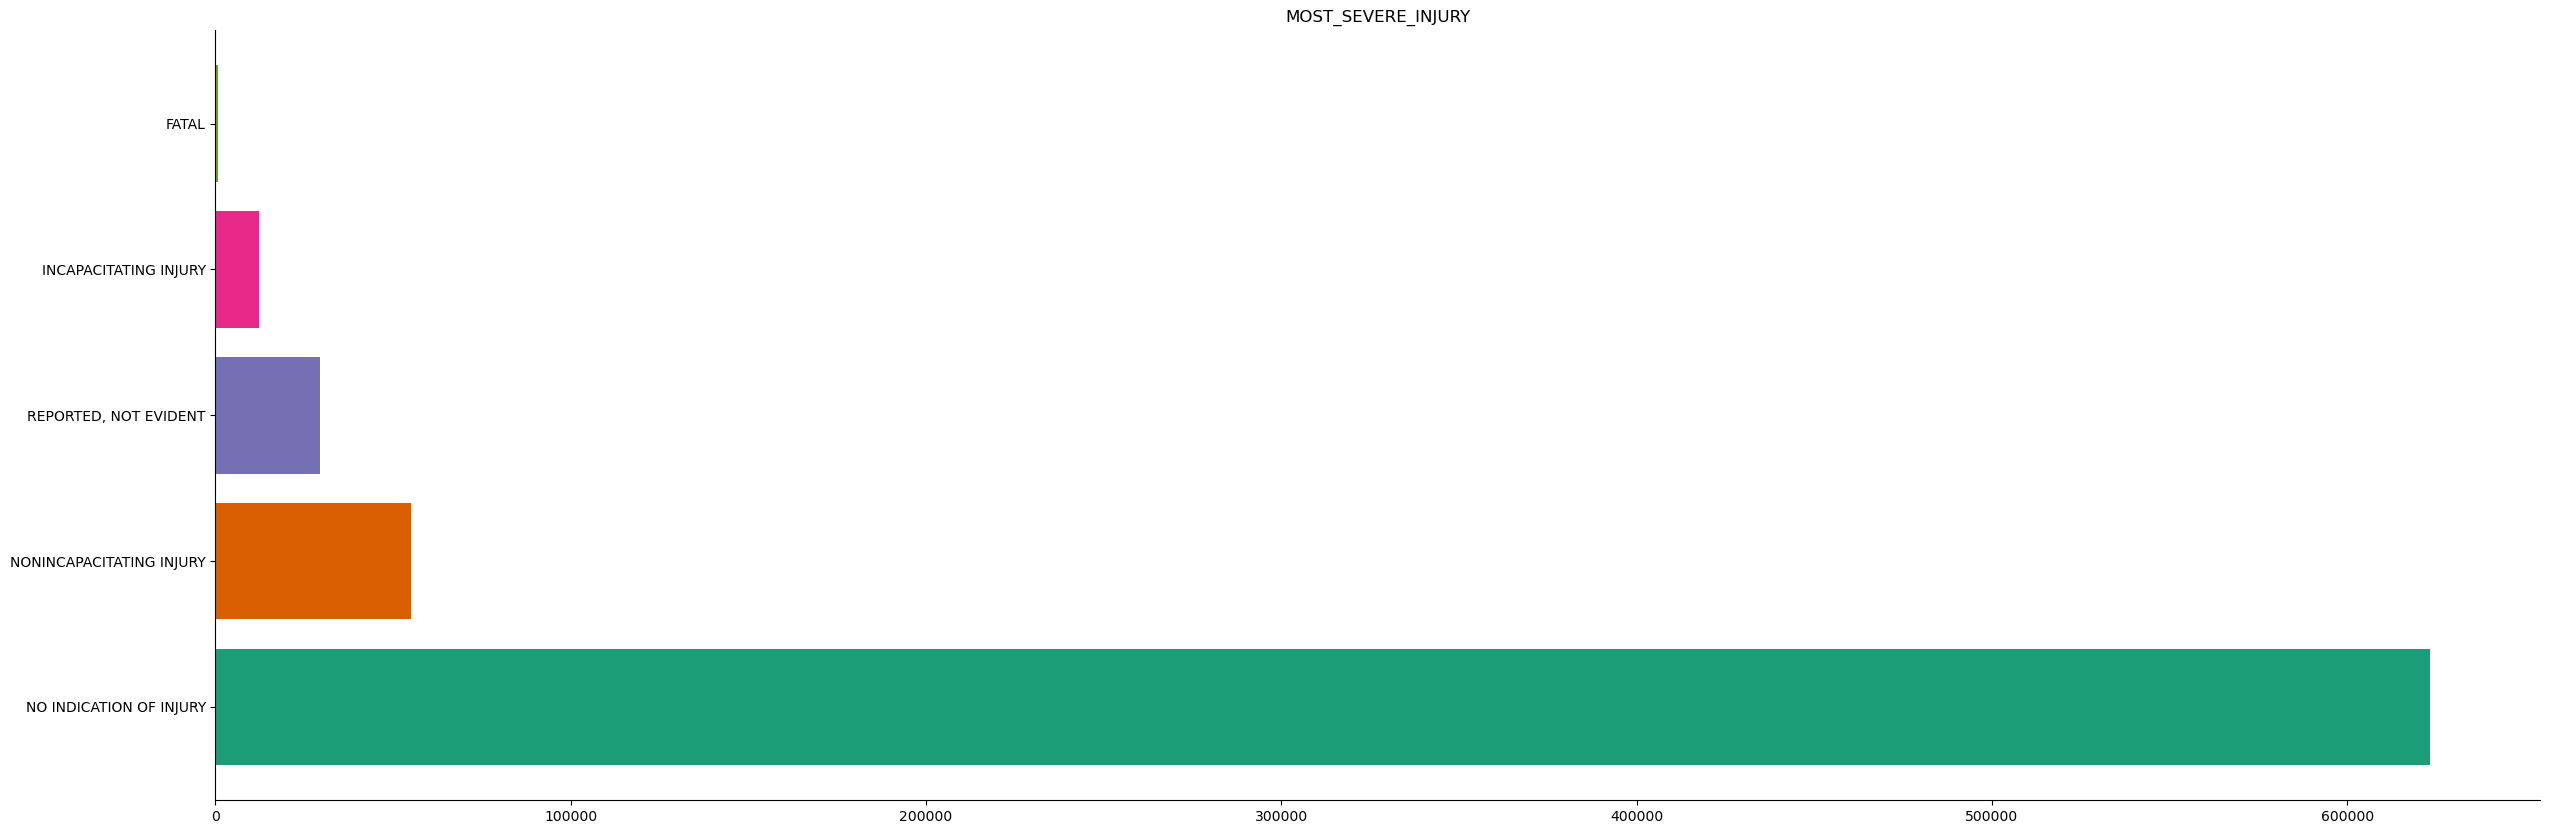

In [37]:
categorical_histogram(chicago, *['MOST_SEVERE_INJURY'])

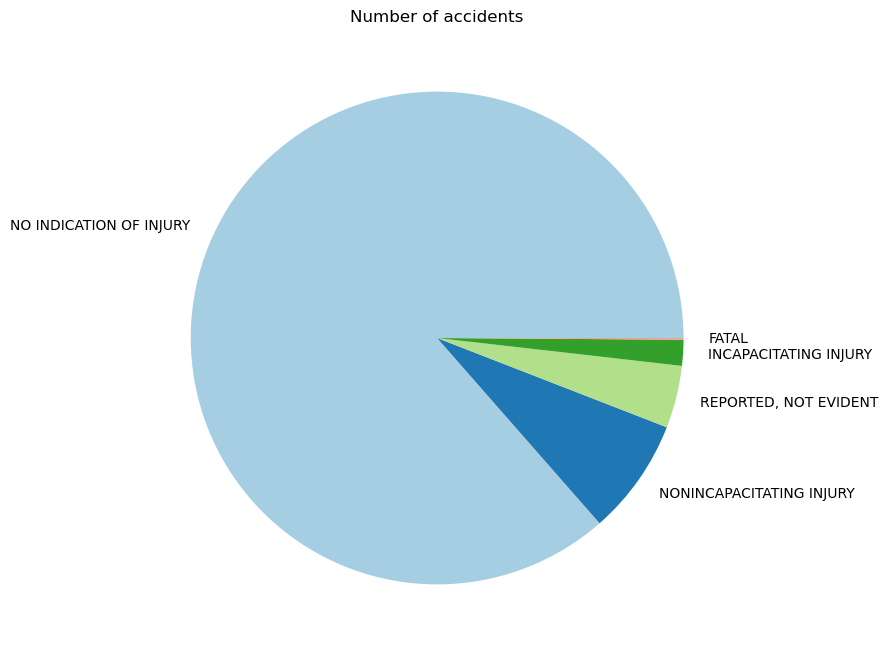

In [38]:
counts = chicago['MOST_SEVERE_INJURY'].value_counts()

plt.figure(figsize=(20, 8))
plt.title("Number of accidents")
plt.pie(x=counts.values, labels=counts.index, colors=sns.color_palette("Paired", 8))
plt.show()

Các vụ tai nạn nói chung có xu hướng giảm dần về mức độ nghiêm trọng, với tai nạn chết người (FATAL) chiếm ít nhất.

# Data Preprocessing

In [39]:
chicago_preprocessing = chicago.copy()

In [40]:
label_encoder = {}
for column in chicago.columns:
    label_encoder[column] = LabelEncoder()
    # label_encoder[column].fit(chicago[column])
    # print(chicago[column])
    if column in ['POSTED_SPEED_LIMIT', 'NUM_UNITS', 'CRASH_HOUR', 'CRASH_MONTH']:
        chicago_preprocessing[column] = chicago[column].copy()
    else:
        chicago_preprocessing[column] = label_encoder[column].fit_transform(chicago[column])
chicago_preprocessing.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,STREET_DIRECTION,DOORING_I,WORK_ZONE_I,NUM_UNITS,MOST_SEVERE_INJURY,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,15,4,3,2,1,2,0,5,0,1,0,0,3,0,0,1,2,2,5,5
1,20,4,3,2,0,2,8,5,0,1,0,0,3,0,0,1,2,1,5,5
2,30,4,3,2,0,2,3,5,0,1,1,0,3,0,0,2,2,0,5,5
3,30,4,3,2,0,15,8,5,0,1,0,0,3,0,0,2,2,22,1,5
4,35,15,1,2,0,0,6,5,0,1,1,0,1,0,0,2,2,21,1,5


In [41]:
x_chicago = chicago_preprocessing.drop(columns=['MOST_SEVERE_INJURY'])
x_chicago.head()

,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,STREET_DIRECTION,DOORING_I,WORK_ZONE_I,NUM_UNITS,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH
0,15,4,3,2,1,2,0,5,0,1,0,0,3,0,0,1,2,5,5
1,20,4,3,2,0,2,8,5,0,1,0,0,3,0,0,1,1,5,5
2,30,4,3,2,0,2,3,5,0,1,1,0,3,0,0,2,0,5,5
3,30,4,3,2,0,15,8,5,0,1,0,0,3,0,0,2,22,1,5
4,35,15,1,2,0,0,6,5,0,1,1,0,1,0,0,2,21,1,5


In [42]:
y_chicago = chicago_preprocessing[['MOST_SEVERE_INJURY']]
y_chicago.head()

,MOST_SEVERE_INJURY
0,2
1,2
2,2
3,2
4,2


In [43]:
print(x_chicago.shape)
print(y_chicago.shape)

(720891, 19)
(720891, 1)


# Correlation Matrix (Ma trận tương quan)
Các feature được visualize trong một ma trận ở dạng heatmap để xác định tương quan giữa các feature:

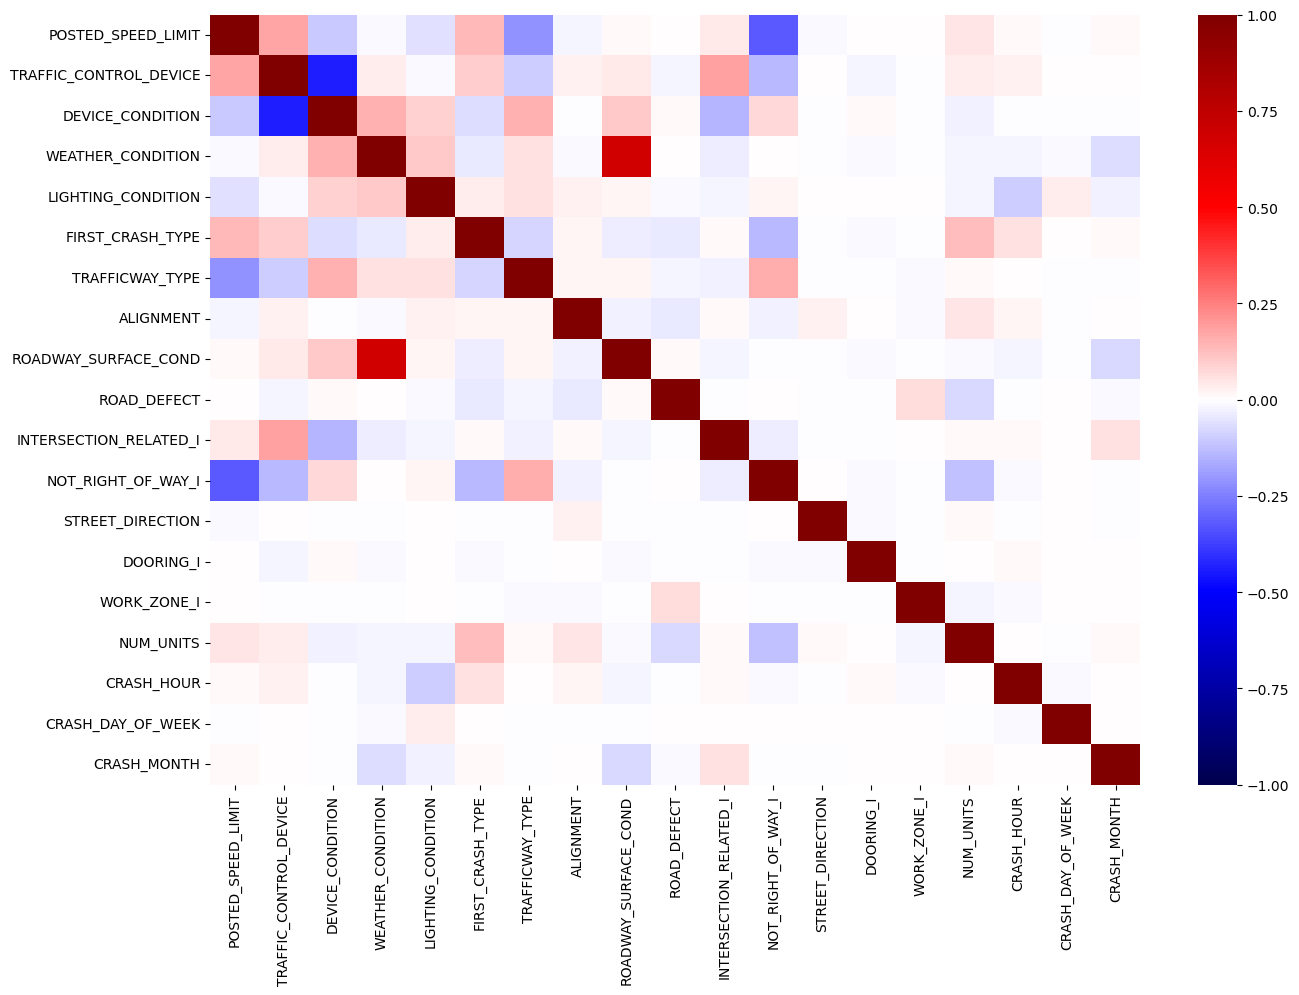

In [44]:
corr_matrix = x_chicago.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="seismic")
plt.gca().patch.set(hatch="X", edgecolor="#666")
plt.show()

Hầu như các feature có tương quan thấp.
Cao nhất (màu đỏ) là 2 feature điều kiện bề mặt đường & điều kiện thời tiết. Theo các field ở trên có thể thấy thời tiết thường ảnh hưởng đến trực tiếp đến bề mặt đường.

# Model

## Split data

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x_chicago.copy(), y_chicago.copy(), test_size=0.2, random_state=42, stratify=y_chicago.copy())
print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')

x_train shape: (576712, 19), y_train shape: (576712, 1)
x_test shape: (144179, 19), y_test shape: (144179, 1)


## Standardization

In [46]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

## Apply Decision Tree Model

In [47]:
kernel = DecisionTreeClassifier(random_state=42)
parameters = [{"criterion": ["gini", "entropy"], "max_depth": [5, 10, 15, 30]}]
model = GridSearchCV(kernel, parameters, cv=5, verbose=4, n_jobs=-1)
model

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 15, 30]}],
             verbose=4)

In [48]:
model.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 15, 30]}],
             verbose=4)

## Model Score

In [49]:
print("Best parameters scores:")
print(model.best_params_)
print(f'Train score: {model.score(x_train, y_train)}')
print(f'Validation score: {model.score(x_test, y_test)}')

Best parameters scores:
{'criterion': 'entropy', 'max_depth': 5}
Train score: 0.8766333976057373
Validation score: 0.8757932847363347


In [50]:
print("Default scores:")
kernel.fit(x_train, y_train)
print("Train score:", kernel.score(x_train, y_train))
print("Validation score:", kernel.score(x_test, y_test))

Default scores:
Train score: 0.9862912510923997
Validation score: 0.7837757232329258


In [51]:
pd.DataFrame(model.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
4,4.236398,0.343304,0.071737,0.008879,entropy,5,"{'criterion': 'entropy', 'max_depth': 5}",0.877218,0.877123,0.875943,0.876264,0.876610,0.876632,0.000489,1
0,4.357060,0.375921,0.057563,0.005431,gini,5,"{'criterion': 'gini', 'max_depth': 5}",0.877132,0.877114,0.875943,0.876264,0.876584,0.876607,0.000467,2
5,5.648944,0.150973,0.038915,0.005024,entropy,10,"{'criterion': 'entropy', 'max_depth': 10}",0.876620,0.876325,0.875163,0.875570,0.875076,0.875751,0.000620,3
1,6.683252,0.488908,0.058160,0.004115,gini,10,"{'criterion': 'gini', 'max_depth': 10}",0.876126,0.876247,0.875067,0.875267,0.875093,0.875560,0.000518,4
2,8.057397,0.481310,0.084130,0.016758,gini,15,"{'criterion': 'gini', 'max_depth': 15}",0.870326,0.869632,0.868305,0.868920,0.868253,0.869087,0.000796,5
6,5.859876,0.172074,0.030442,0.004782,entropy,15,"{'criterion': 'entropy', 'max_depth': 15}",0.868531,0.868644,0.867524,0.867576,0.867524,0.867960,0.000514,6
3,9.878170,0.842910,0.201093,0.073239,gini,30,"{'criterion': 'gini', 'max_depth': 30}",0.806898,0.803716,0.803853,0.806783,0.803610,0.804972,0.001528,7
7,5.593952,0.243342,0.046605,0.003870,entropy,30,"{'criterion': 'entropy', 'max_depth': 30}",0.799650,0.797907,0.796848,0.800116,0.799596,0.798823,0.001241,8


## Result

In [52]:
y_pred = kernel.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred, average="macro")}')
print(f'--------------------- TRAIN ---------------------')
print(classification_report(y_train, kernel.predict(x_train)))
print(f'--------------------- TEST ---------------------')
print(classification_report(y_test, y_pred))

Accuracy: 0.7837757232329258
F1: 0.2526596920481555
--------------------- TRAIN ---------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       631
           1       0.95      0.97      0.96      9794
           2       0.99      1.00      0.99    498604
           3       0.99      0.91      0.95     44077
           4       1.00      0.86      0.92     23606

    accuracy                           0.99    576712
   macro avg       0.98      0.95      0.96    576712
weighted avg       0.99      0.99      0.99    576712

--------------------- TEST ---------------------
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       158
           1       0.07      0.09      0.08      2449
           2       0.90      0.88      0.89    124652
           3       0.21      0.22      0.21     11019
           4       0.07      0.08      0.07      5901

    accuracy                      

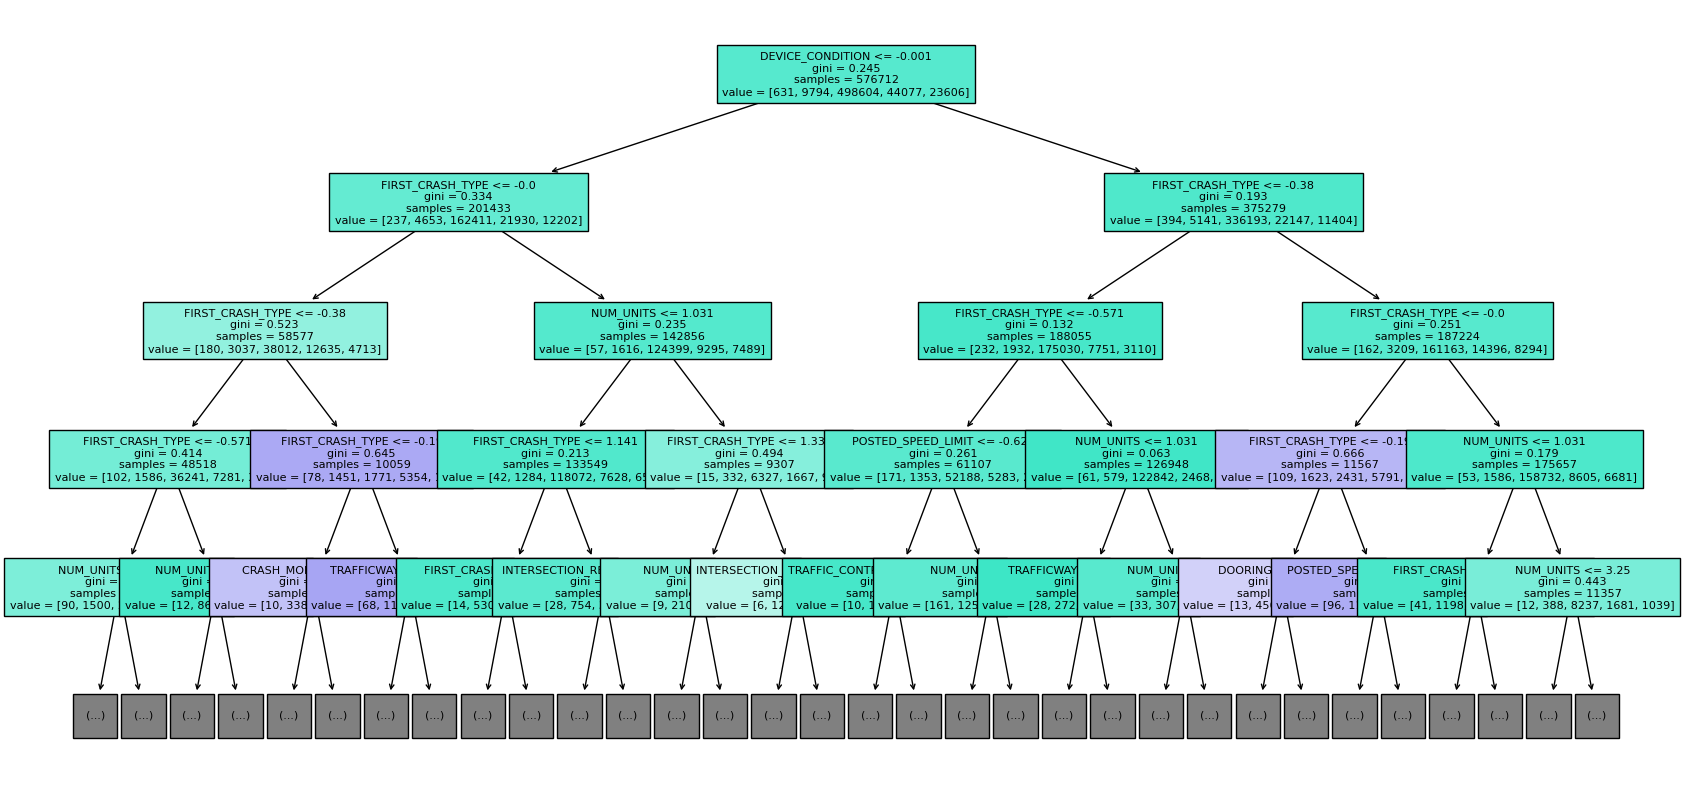

In [53]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(kernel, max_depth=4, fontsize=8, feature_names=x_chicago.columns.to_list(), class_names = None, filled=True)
plt.show()

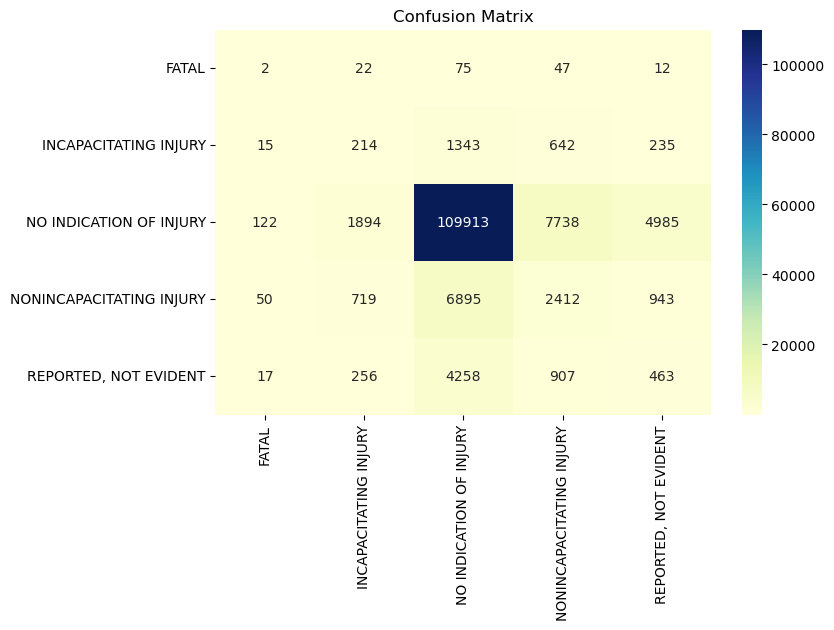

In [54]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
index = list(label_encoder['MOST_SEVERE_INJURY'].classes_)
columns = list(label_encoder['MOST_SEVERE_INJURY'].classes_)
# index
conf_matrix = pd.DataFrame(data=cm, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.show()

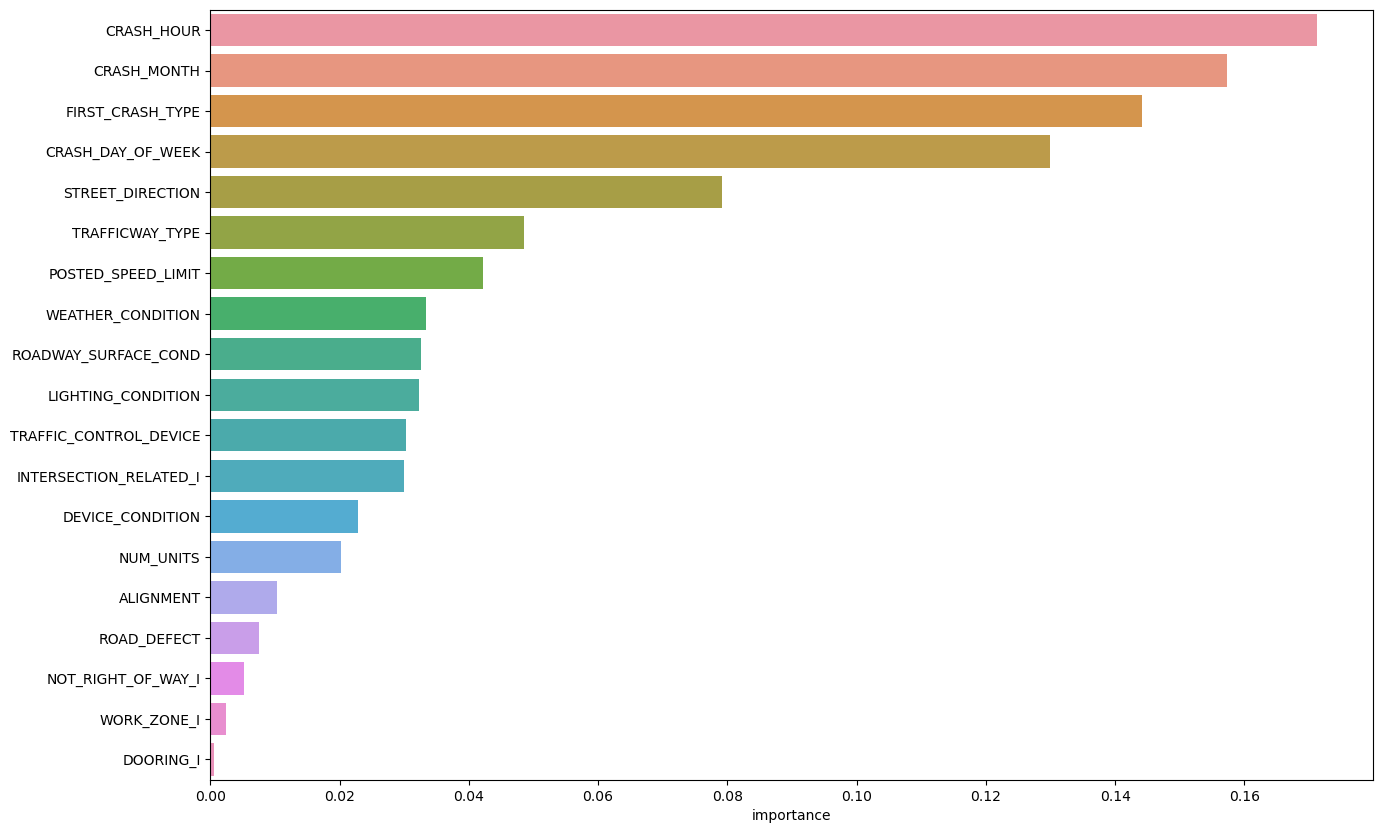

In [55]:
importances = pd.DataFrame(np.zeros((x_train.shape[1], 1)), columns=["importance"], index=x_chicago.columns)

importances.iloc[:,0] = kernel.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

## Apply Random Forest

In [56]:
rfc = RandomForestClassifier(n_jobs=4, random_state=42)
parameters = [{"n_estimators": [50, 100, 200, 500], "max_depth": [5, 10, 15, 30]}]
rfc_model = GridSearchCV(rfc, parameters, verbose=5, n_jobs=4)
rfc_model.fit(x_train, y_train)

print("Best parameters scores:")
print(rfc_model.best_params_)
print("Train score:", rfc_model.score(x_train, y_train))
print("Validation score:", rfc_model.score(x_test, y_test))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


f:\Programs\Anaconda\envs\data_governance_env\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters scores:
{'max_depth': 15, 'n_estimators': 500}
Train score: 0.8811590533923345
Validation score: 0.8753563278979601


In [ ]:
print("Default scores:")
rfc.fit(x_train, y_train)
print("Train score:", rfc.score(x_train, y_train)) 
print("Validation score:", rfc.score(x_test, y_test))

Default scores:


f:\Programs\Anaconda\envs\data_governance_env\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train score: 0.9862531038022444
Validation score: 0.862927333384196


In [ ]:
pd.DataFrame(rfc_model.cv_results_).sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,478.104271,11.740940,9.937942,1.221071,15,500,"{'max_depth': 15, 'n_estimators': 500}",0.876447,0.876360,0.875821,0.875995,0.875960,0.876117,0.000243,1
10,224.539312,10.095566,4.771856,0.812093,15,200,"{'max_depth': 15, 'n_estimators': 200}",0.876005,0.876247,0.875873,0.875865,0.875934,0.875985,0.000140,2
9,118.427855,2.490275,3.029279,0.330390,15,100,"{'max_depth': 15, 'n_estimators': 100}",0.876117,0.875823,0.875622,0.875726,0.875605,0.875779,0.000187,3
8,54.259764,4.740770,1.848147,0.579260,15,50,"{'max_depth': 15, 'n_estimators': 50}",0.875875,0.875250,0.875865,0.875379,0.874582,0.875390,0.000476,4
15,630.160009,214.999384,136.220660,68.939417,30,500,"{'max_depth': 30, 'n_estimators': 500}",0.873655,0.873976,0.873359,0.873481,0.873472,0.873589,0.000216,5
14,308.537854,5.975607,18.882127,3.102006,30,200,"{'max_depth': 30, 'n_estimators': 200}",0.873768,0.873872,0.873064,0.873212,0.873082,0.873400,0.000348,6
13,136.585848,4.060054,5.766216,1.102959,30,100,"{'max_depth': 30, 'n_estimators': 100}",0.873404,0.873629,0.872605,0.872709,0.872605,0.872990,0.000437,7
12,74.837983,2.375222,4.009185,0.547997,30,50,"{'max_depth': 30, 'n_estimators': 50}",0.872875,0.873083,0.872007,0.872362,0.872033,0.872472,0.000437,8
4,47.043597,2.511342,1.586027,0.334622,10,50,"{'max_depth': 10, 'n_estimators': 50}",0.869242,0.868375,0.871781,0.868573,0.866909,0.868976,0.001596,9
6,181.421100,7.423586,4.732353,0.753019,10,200,"{'max_depth': 10, 'n_estimators': 200}",0.867794,0.867786,0.869692,0.868114,0.867724,0.868222,0.000747,10


In [ ]:
y_pred = rfc.predict(x_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1: {f1_score(y_test, y_pred, average="macro")}')
print(f'--------------------- TRAIN ---------------------')
print(classification_report(y_train, rfc.predict(x_train)))
print(f'--------------------- TEST ---------------------')
print(classification_report(y_test, y_pred))

Accuracy: 0.862927333384196
F1: 0.2564506785710964
--------------------- TRAIN ---------------------
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       631
           1       0.99      0.93      0.96      9794
           2       0.99      1.00      0.99    498604
           3       0.99      0.92      0.95     44077
           4       0.98      0.87      0.92     23606

    accuracy                           0.99    576712
   macro avg       0.99      0.94      0.96    576712
weighted avg       0.99      0.99      0.99    576712

--------------------- TEST ---------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       158
           1       0.13      0.02      0.04      2449
           2       0.89      0.98      0.93    124652
           3       0.42      0.23      0.30     11019
           4       0.07      0.01      0.02      5901

    accuracy                       

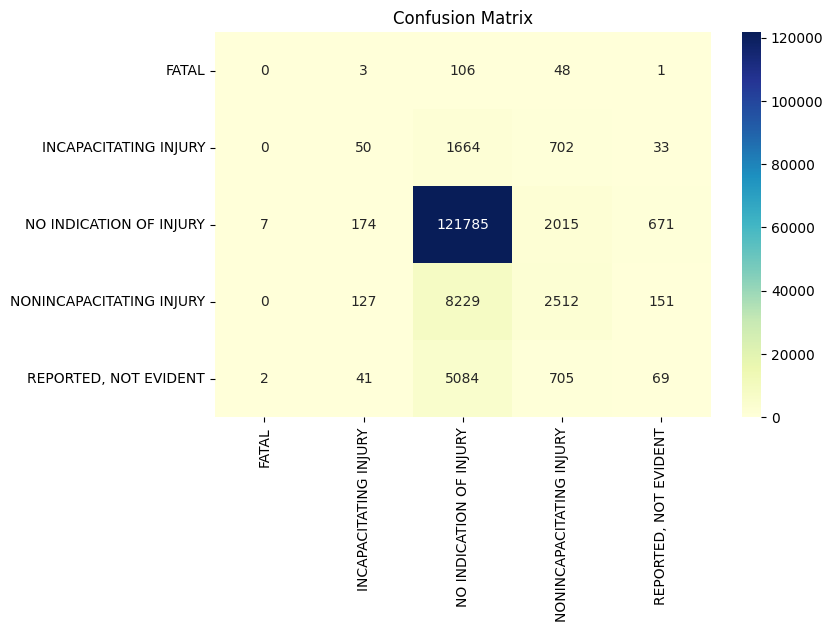

In [ ]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
index = list(label_encoder['MOST_SEVERE_INJURY'].classes_)
columns = list(label_encoder['MOST_SEVERE_INJURY'].classes_)
# index
conf_matrix = pd.DataFrame(data=cm, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
importances = pd.DataFrame(np.zeros((x_train.shape[1], 1)), columns=["importance"], index=x_chicago.columns)

importances.iloc[:,0] = rfc.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:30]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()

# Conclusion

<p>Các model bị overfitting.</p> 
<p>Nguyên nhân gây ra là do sự chênh lệch quá lớn số lượng các mẫu theo từng nhãn, từ biểu đồ "Number of accidents" chúng ta có thể thấy, "NO INDICATION OF INJURY" chiếm đến hơn 75% số lượng samples.</p> 
<p>Theo biểu đồ importance, các features về mặt thời gian lại chiếm tỉ trọng cao nhất. Dựa vào các biểu đồ nhãn ở trên, các feature bị thiên quá nhiều vào một category có tỷ trọng thấp hơn hơn so với các feature có phân phối mẫu dàn trải hơn như các feature về thời gian.</p>